<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/indicator/1.heatmap_etfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance==0.2.43 --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.7 MB/s eta 0:00:00


In [16]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define the indices and their tickers
indices = {
    'NIFTY 50': 'NIFTYBEES.NS',
    'NIFTY NEXT 50': 'JUNIORBEES.NS',
    'NIFTY 200 MOMENTUM':'HDFCMOMENT.NS',
    'NIFTY50 VALUE20':'NV20BEES.NS',
    'NIFTY 100': 'NIF100BEES.NS',
    'NIFTY DIV OPPS':'DIVOPPBEES.NS',
    'NIFTY MIDCAP 100': 'MID150BEES.ns',
    'NIFTY SMALLCAP 100': 'SMALLCAP.NS',
    'NIFTY BANK': 'BANKBEES.NS',
    'NIFTY IT': 'ITBEES.NS',
    'NIFTY PHARMA': 'pharmabees.ns',
    'NIFTY AUTO': 'AUTOBEES.NS',
    'NIFTY METAL': '^CNXMETAL',#METALIETF
    'NIFTY FMCG': '^CNXFMCG',
    'NIFTY INFRA': 'INFRABEES.NS',
    'NIFTY MEDIA': '^CNXMEDIA',
    'NIFTY PSU BANK': 'PSUBNKBEES.NS',
    'NIFTY REALTY': '^CNXREALTY',
    'NIFTY ENERGY': '^CNXENERGY',
    'NIFTY CONSUMPTION': 'CONSUMBEES.NS',
    'HONG KONG STOCK EXCHANGE':'HNGSNGBEES.NS',
    'NIFTY 5YR GSEC':'GILT5YBEES.NS',
    'NIFTY 8-13 YR GSEC':'LTGILTBEES.NS',
    'GOLD':'GOLDBEES.NS',
    'SILVER':'SILVERBEES.NS',

}
#'NIFTTY 200 VALUE':'HDFCVALUE.NS'
# Define the periods and frequencies
periods = {
    'Weekly': pd.DateOffset(weeks=1),
    'Monthly': pd.DateOffset(months=1),
    'Quarterly': pd.DateOffset(months=3),
    'Half-Yearly': pd.DateOffset(months=6),
}

# Initialize data dictionary
data = {}

# Download the data
for index_name, ticker in indices.items():
    print(f"Downloading data for {index_name} ({ticker})")
    df = yf.download(ticker, period='1y')
    if df.empty:
        print(f"No data found for {index_name}")
    else:
        data[index_name] = df

# Initialize the returns DataFrame
returns_df = pd.DataFrame(index=indices.keys(), columns=periods.keys())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

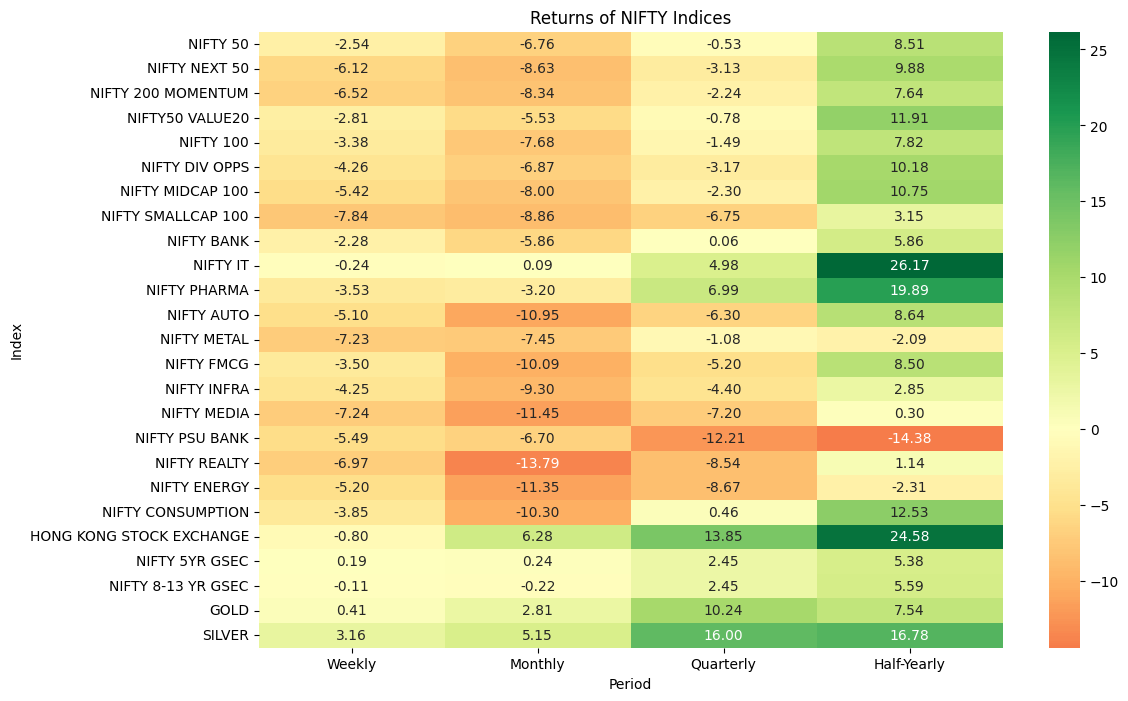

In [17]:

# Calculate the returns
for index_name, df in data.items():
    adj_close = df['Adj Close'].dropna()
    adj_close.index = pd.to_datetime(adj_close.index)
    end_date = adj_close.index[-1]
    end_price = adj_close.iloc[-1]
    for period_name, date_offset in periods.items():
        start_date = end_date - date_offset
        # Find the closest date less than or equal to the start_date
        start_dates = adj_close.index[adj_close.index <= start_date]
        if not start_dates.empty:
            start_price = adj_close.loc[start_dates[-1]]
            # Calculate the return
            return_value = (end_price / start_price - 1) * 100
            returns_df.loc[index_name, period_name] = return_value
        else:
            returns_df.loc[index_name, period_name] = None

# Convert returns_df to float
returns_df = returns_df.astype(float)

# Convert returns_df to float
returns_df = returns_df.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(returns_df, annot=True, fmt=".2f", cmap="RdYlGn", center=0)
plt.title('Returns of NIFTY Indices')
plt.xlabel('Period')
plt.ylabel('Index')
plt.show()


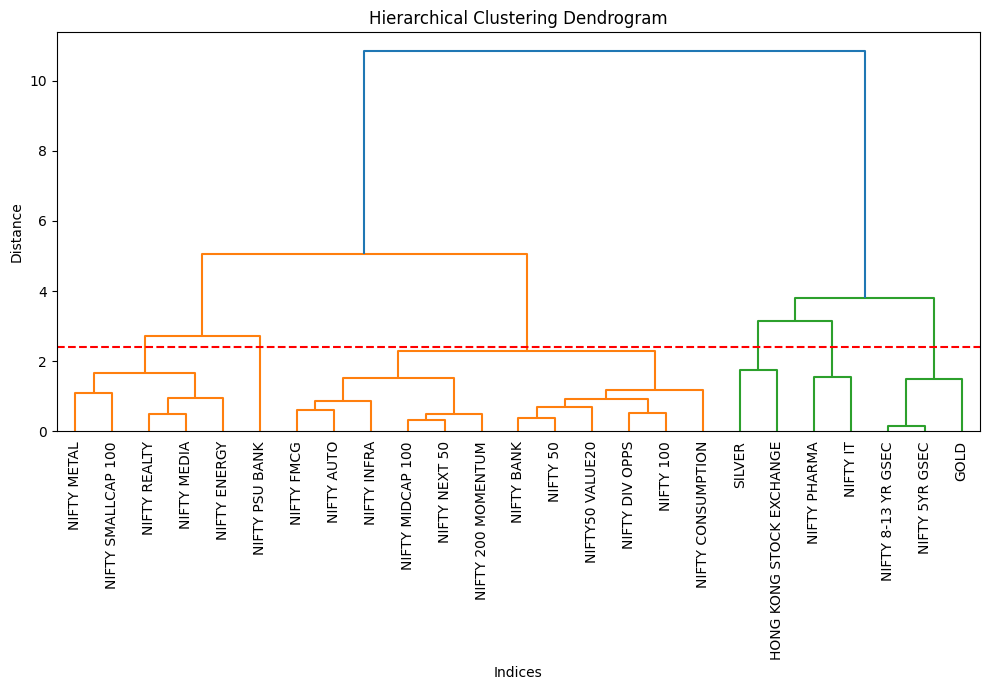

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
# Standardize the returns data
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns_df)

# Perform hierarchical clustering
linked = linkage(returns_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           labels=returns_df.index.tolist(),
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Indices')
plt.ylabel('Distance')
plt.xticks(rotation=90, fontsize=10)
plt.axhline(y=2.4, color='r', linestyle='--')
plt.tight_layout()
plt.show()



Let's analyze the dendrogram closely using your interpretation and confirm the clusters at a distance cutoff of 4.

To do this accurately, let's focus on where the branches merge relative to the cutoff line of 4. This way, we ensure that we group indices that are merged at or below this threshold.

### Revised Cluster Analysis at Distance Cutoff 4

1. **Cluster 1** (starts at NIFTY REALTY and ends at NIFTY 100):
   - **Indices**: NIFTY REALTY, NIFTY MEDIA, NIFTY SMALLCAP 100, NIFTY ENERGY, NIFTY INFRA, NIFTY METAL, NIFTY FMCG, NIFTY AUTO, NIFTY MIDCAP 100, **NIFTY 100**
   - **Reasoning**: All these indices merge below a distance of 4 and belong to the same continuous branch. They form a cohesive group under the cutoff.

2. **Cluster 2** (NIFTY PSU BANK):
   - **Indices**: **NIFTY PSU BANK**
   - **Reasoning**: NIFTY PSU BANK forms a separate branch that merges with Cluster 1 at a distance greater than 4. Hence, it stands alone as its own cluster when using a cutoff of 4.

3. **Cluster 3** (includes NIFTY 50, NIFTY BANK, and NIFTY CONSUMPTION):
   - **Indices**: **NIFTY 50, NIFTY BANK, NIFTY CONSUMPTION**
   - **Reasoning**: These indices form their own branch that merges at a distance below 4. They don’t merge with other indices until the cutoff, making them a distinct cluster.

4. **Cluster 4** (starts at SILVER and ends at NIFTY IT):
   - **Indices**: **SILVER, GOLD, HONG KONG STOCK EXCHANGE, NIFTY PHARMA, NIFTY IT**
   - **Reasoning**: These indices form a separate branch that merges together below a distance of 4. They don’t connect to other clusters until much higher, so they form their own group.

### Final Cluster Assignment at a Distance Cutoff of 4

- **Cluster 1**: NIFTY REALTY, NIFTY MEDIA, NIFTY SMALLCAP 100, NIFTY ENERGY, NIFTY INFRA, NIFTY METAL, NIFTY FMCG, NIFTY AUTO, NIFTY MIDCAP 100, NIFTY 100
- **Cluster 2**: NIFTY PSU BANK
- **Cluster 3**: NIFTY 50, NIFTY BANK, NIFTY CONSUMPTION
- **Cluster 4**: SILVER, GOLD, HONG KONG STOCK EXCHANGE, NIFTY PHARMA, NIFTY IT

Your interpretation was indeed correct! Each grouping aligns with the cutoff at 4, and the reasoning is based on how these indices merge in the dendrogram. Thank you for prompting this careful review.